In [129]:
from drn_interactions.load import load_derived_generic, load_neurons, get_fig_dir
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
outdir = get_fig_dir() / "neuron_types"
outdir.mkdir(exist_ok=True, parents=True)

In [141]:
clusters = load_derived_generic("clusters.csv")
df = load_derived_generic("neurons/burst_features.csv").merge(clusters)
df_neurons = df

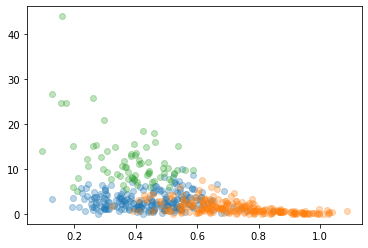

In [51]:
_, ax  = plt.subplots()

ax.scatter(data=df.query("wf_3 == 'sr'"), x="cv2_burst", y="mean_firing_rate", alpha=0.3)
ax.scatter(data=df.query("wf_3 == 'sir'"), x="cv2_burst", y="mean_firing_rate", alpha=0.3)
ax.scatter(data=df.query("wf_3 == 'ff'"), x="cv2_burst", y="mean_firing_rate", alpha=0.3)

In [100]:
import numpy as np
df["waveform_width"] = np.where(df["waveform_width"] > 60, np.nan, df["waveform_width"])

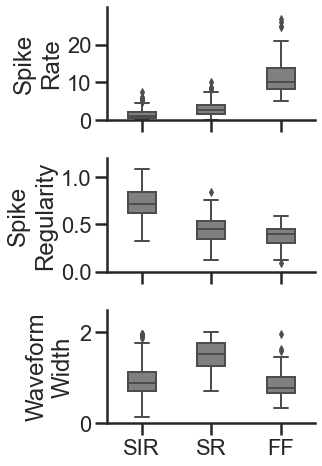

In [131]:
sns.set_theme(context="poster", style="ticks")

_, ax = plt.subplots(figsize=(5, 7), nrows=3, sharex=True)
sns.boxplot(data=df, x="wf_3", y="mean_firing_rate", color="grey", linewidth=2, width=0.4, ax=ax[0])
ax[0].set_ylabel("Spike\nRate")
ax[0].set_yticks([0, 10, 20])
ax[0].set_ylim(0, 30)
ax[0].set_xlabel(None)

sns.boxplot(data=df, x="wf_3", y="cv2_burst",  color="grey", linewidth=2, width=0.4, ax=ax[1])

ax[1].set_ylabel("Spike\nRegularity")
ax[1].set_xlabel(None)
ax[1].set_ylim(0, 1.2)
ax[1].set_yticks([0, 0.5, 1])
sns.despine(left=False, bottom=False)

sns.boxplot(data=df.assign(waveform_width=lambda x: x.waveform_width.divide(30)),
 x="wf_3", y="waveform_width",  color="grey", linewidth=2, width=0.4, ax=ax[2])

ax[2].set_ylabel("Waveform\nWidth")
ax[2].set_ylim(0, 2.5)
ax[2].set_xlabel("")

ax[2].set_xticklabels(["SIR", "SR", "FF"])
plt.tight_layout()
plt.savefig(outdir / "neuron_props.svg")

In [142]:
from drn_interactions.spikes import SpikesHandler

In [238]:
sh = SpikesHandler(
    block="pre", bin_width=0.1, session_names=["hamilton_35"], t_start=0
)

df = sh.spikes

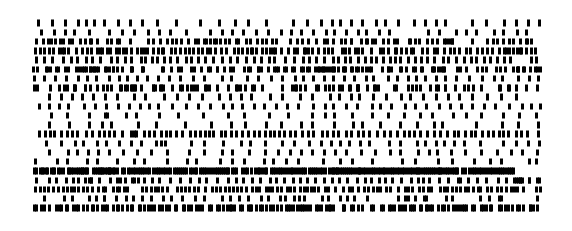

In [252]:
t_start=150
t_stop= t_start + 10

cluster_units = df_neurons.loc[lambda x: (x.session_name == "hamilton_35") & (x.wf_3 == "sr")].neuron_id.unique()
# cluster_units = np.random.choice(cluster_units, size=50)

df1 = df.loc[lambda x: x.neuron_id.isin(cluster_units) & (x.spiketimes >= t_start) & (x.spiketimes <= t_stop)]

trains = [g["spiketimes"] for name, g in df1.groupby("neuron_id") if len(g["spiketimes"]) > 15]
# len(trains / 5)
_, ax = plt.subplots(figsize=(10, len(trains) // 5))


ax.eventplot(trains, color="black", linelengths=0.7)
ax.axis("off")
plt.savefig(outdir / "example_sr_10s.png", dpi=300, transparent=True)

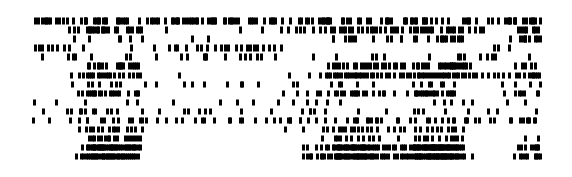

In [253]:
# t_start=300
# t_stop=310

cluster_units = df_neurons.loc[lambda x: (x.session_name == "hamilton_35") & (x.wf_3 == "sir")].neuron_id.unique()
# cluster_units = np.random.choice(cluster_units, size=50)

df1 = df.loc[lambda x: x.neuron_id.isin(cluster_units) & (x.spiketimes >= t_start) & (x.spiketimes <= t_stop)]

trains = [g["spiketimes"] for name, g in df1.groupby("neuron_id") if len(g["spiketimes"]) > 15]

len(trains)
_, ax = plt.subplots(figsize=(10, len(trains) // 5))


ax.eventplot(trains, color="black", linelengths=0.7)
ax.axis("off")
plt.savefig(outdir / "example_sir_10s.png", dpi=300, transparent=True)

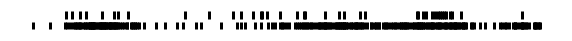

In [257]:
# t_start=300
# t_stop=310

cluster_units = df_neurons.loc[lambda x: (x.session_name == "hamilton_35") & (x.wf_3 == "ff")].neuron_id.unique()
# cluster_units = np.random.choice(cluster_units, size=50)

df1 = df.loc[lambda x: x.neuron_id.isin(cluster_units) & (x.spiketimes >= t_start) & (x.spiketimes <= t_stop)]

trains = [g["spiketimes"] for name, g in df1.groupby("neuron_id") if len(g["spiketimes"]) > 15]
_, ax = plt.subplots(figsize=(10, (len(trains) // 5) + 0.5) )


ax.eventplot(trains, color="black", linelengths=0.7)
ax.axis("off")
plt.savefig(outdir / "example_ff_10s.png", dpi=300)